In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from utils.testcase_creator import *
import utils.app_creator
from optimization.sa.task_graph import PrecedenceGraph
import networkx as nx
import main
from pathlib import Path
from input.input_parameters import InputParameters, EMode, Timeouts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scale topology size

Creating apps with 5 tasks


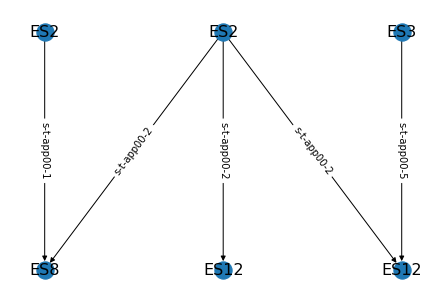

Creating apps with 5 tasks


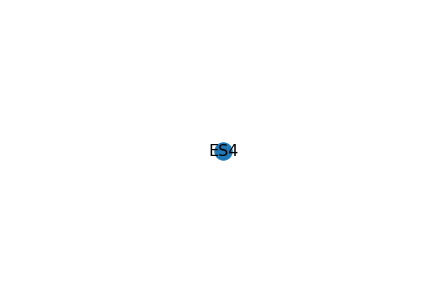

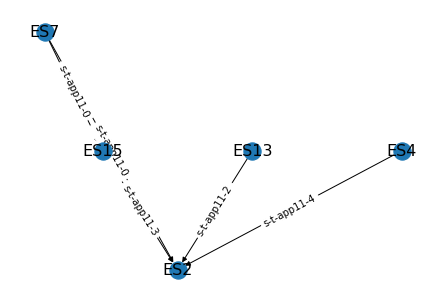

Creating apps with 5 tasks


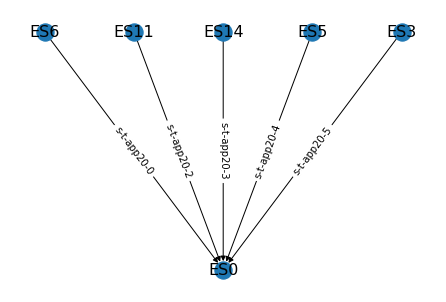

Found possible graph. Is connected: True


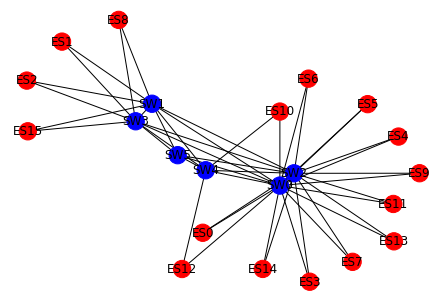

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size0.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


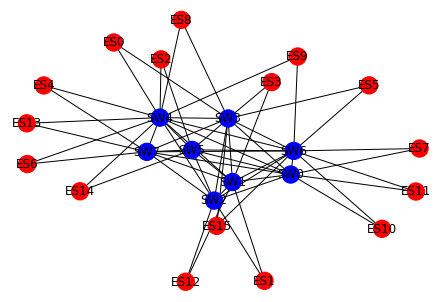

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size1.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


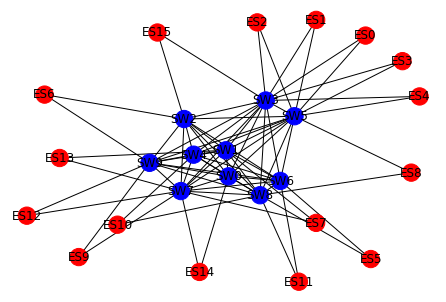

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size2.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


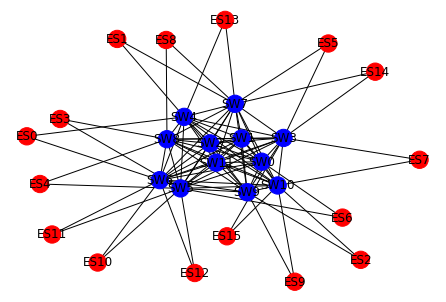

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size3.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


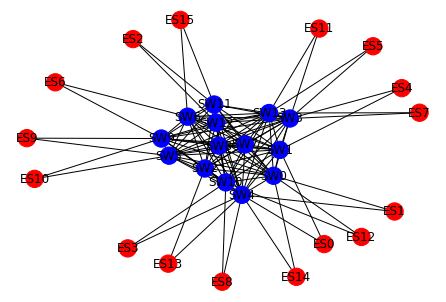

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size4.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


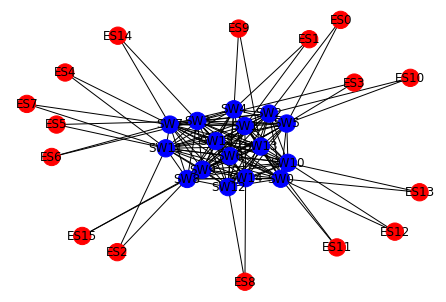

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size5.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


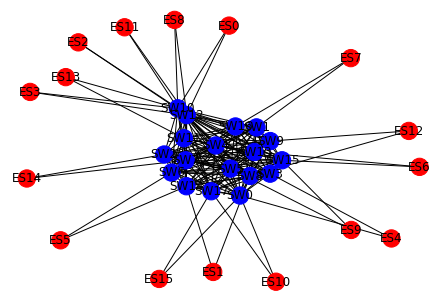

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size6.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


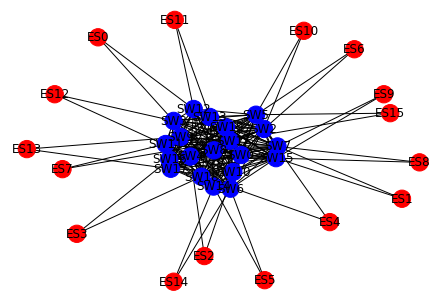

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size7.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


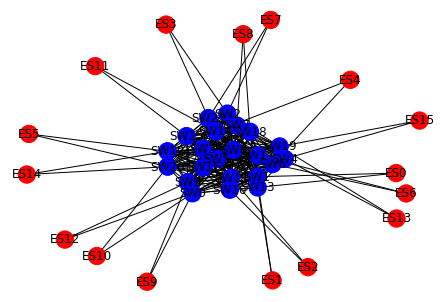

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size8.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------
Found possible graph. Is connected: True


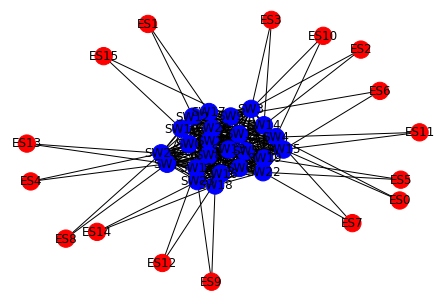

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\topo_size\topo_size9.flex_network_description
Tasks 18; Streams 12; Apps 4; Average ES utilization 0.06622187499999999
--------------------------------------------------


In [22]:
nr_sws = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

config = testcase_generation_config()
config.app_task_connection_probability = 0.4
config.nr_tasks = 16
config.nr_dags = (config.nr_tasks // 8) + 1
config.periods = [10000, 15000, 20000, 50000]
config.link_speed = 125 # 100 mbit
config.stream_max_rl = 1
config.connections_per_es = min(config.nr_sw, 4)
config.nr_es = 16

tasks_per_app = config.nr_tasks // config.nr_dags

es_utilization_dict = {}
for j in range(config.nr_es):
    es_utilization_dict[f"ES{j}"] = 0

app_lst = []
for k in range(config.nr_dags):
    app_lst.append(app_creator.create_apps(f"app{k}", config, es_utilization_dict, tasks_per_app, True, ""))

for i in range(10):
    config.nr_sw = nr_sws[i]
    config.connections_per_sw = config.nr_sw -1
    
    G, points_sw, points_es = topology_creator.generate_topology(config.nr_sw, config.nr_es, config.connections_per_sw,
                                                                     config.connections_per_es, True)

    path = create_testcase_with_topology_and_dags_and_apps(config, Path(f"../../testcases/scalability_figure/topo_size/topo_size{i}.flex_network_description"), G, points_sw, points_es, app_lst, es_utilization_dict, "")


# Scale amount of apps

Found possible graph. Is connected: True


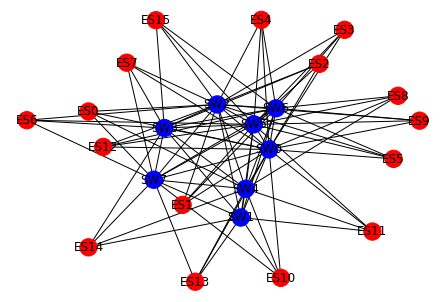

Creating apps with 4 tasks


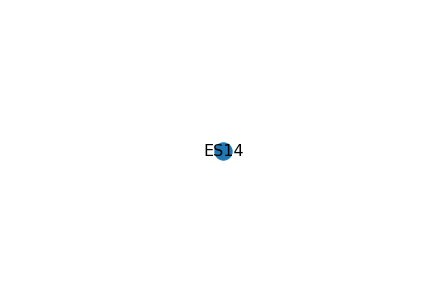

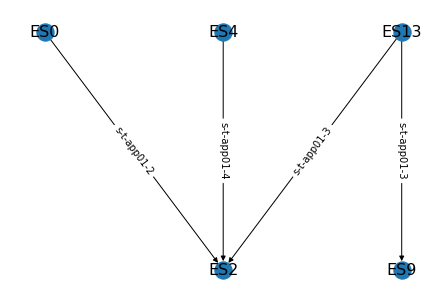

Creating apps with 4 tasks


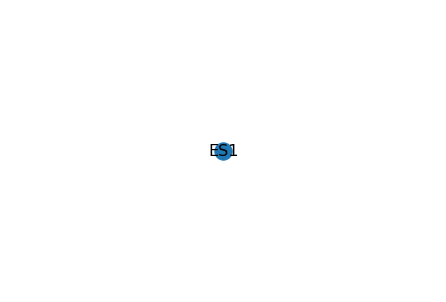

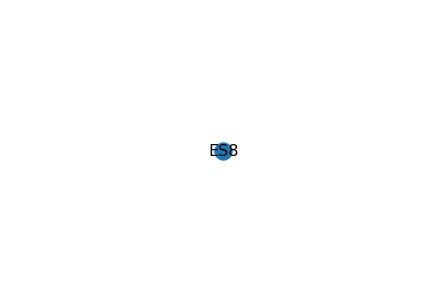

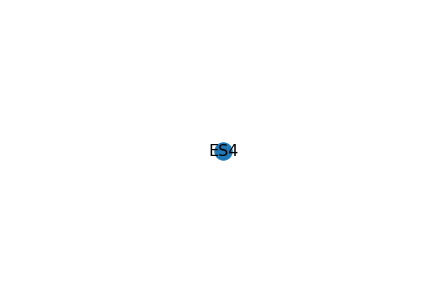

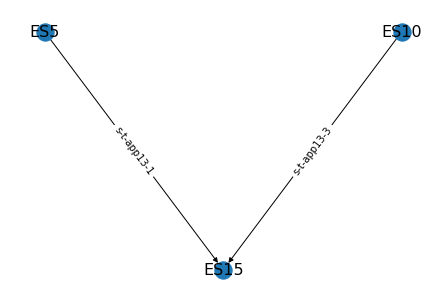

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps0.flex_network_description
Tasks 12; Streams 5; Apps 6; Average ES utilization 0.02397625
--------------------------------------------------
Creating apps with 5 tasks


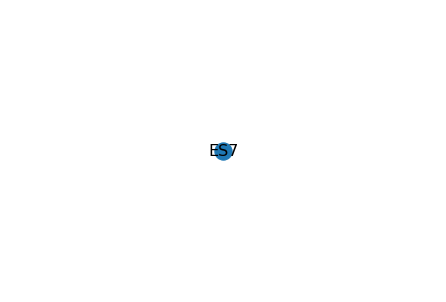

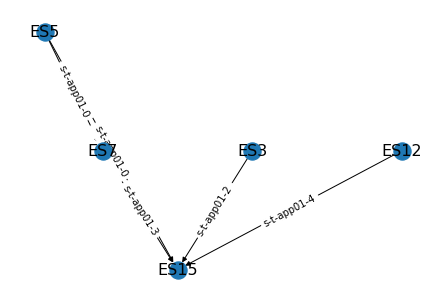

Creating apps with 5 tasks


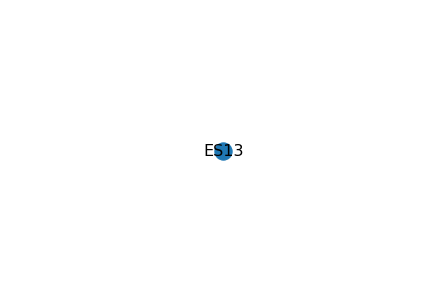

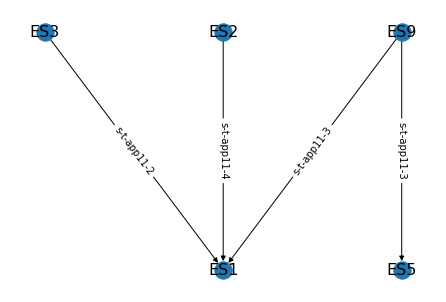

Creating apps with 5 tasks


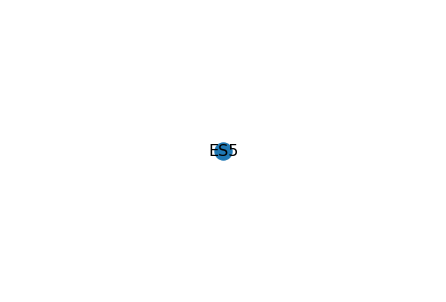

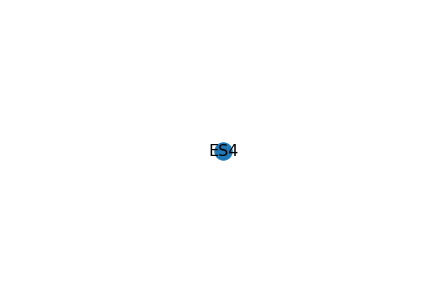

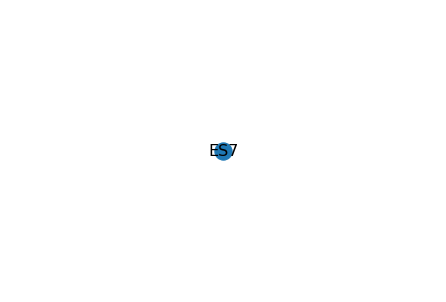

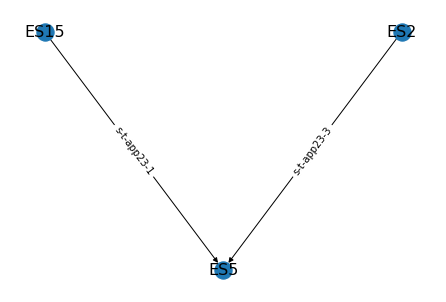

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps1.flex_network_description
Tasks 18; Streams 9; Apps 8; Average ES utilization 0.05091249999999999
--------------------------------------------------
Creating apps with 6 tasks


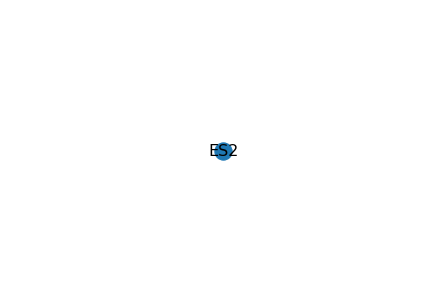

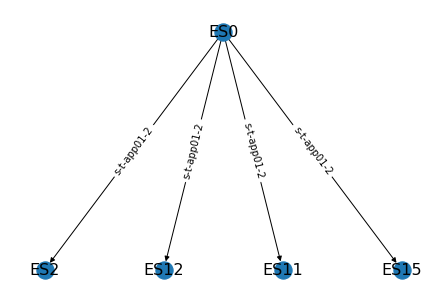

Creating apps with 6 tasks


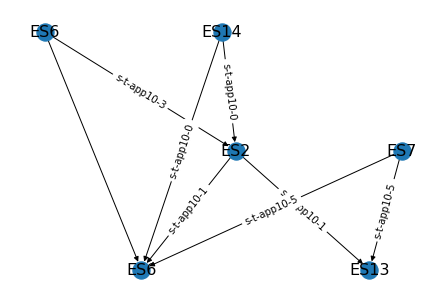

Creating apps with 6 tasks


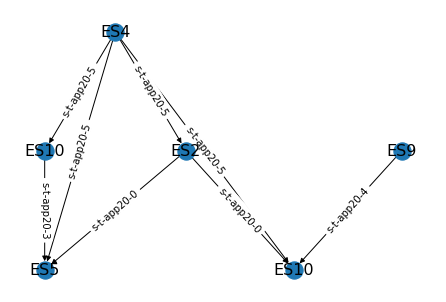

Creating apps with 6 tasks


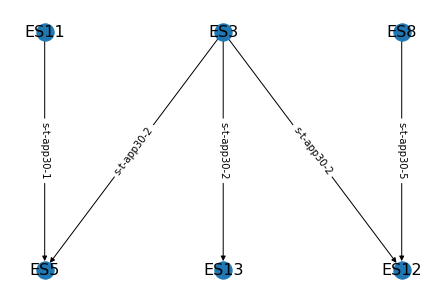

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps2.flex_network_description
Tasks 24; Streams 12; Apps 5; Average ES utilization 0.07180833333333332
--------------------------------------------------
Creating apps with 6 tasks


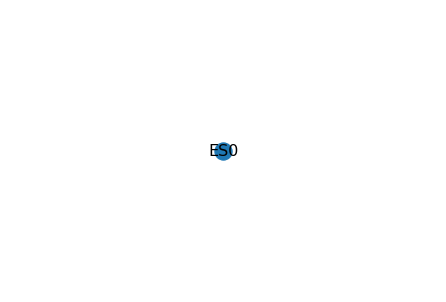

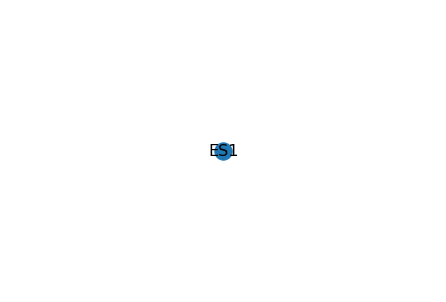

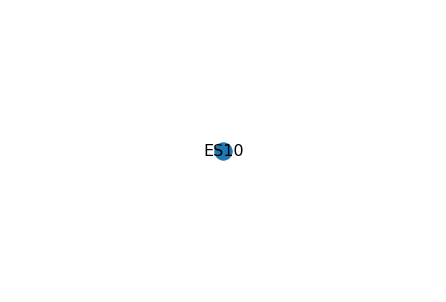

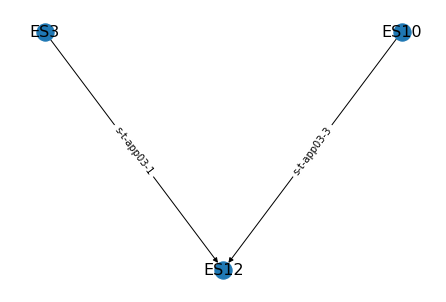

Creating apps with 6 tasks


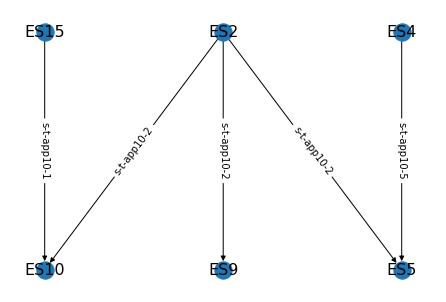

Creating apps with 6 tasks


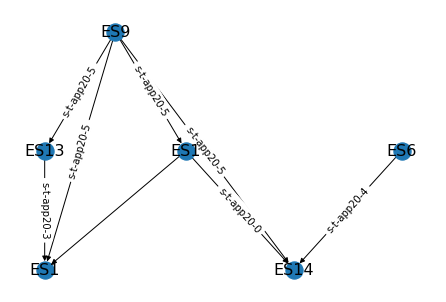

Creating apps with 6 tasks


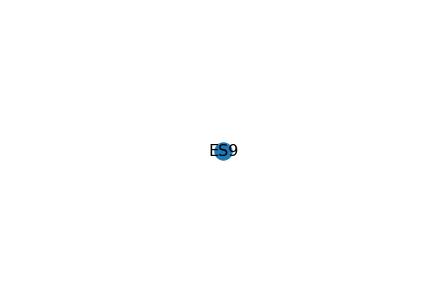

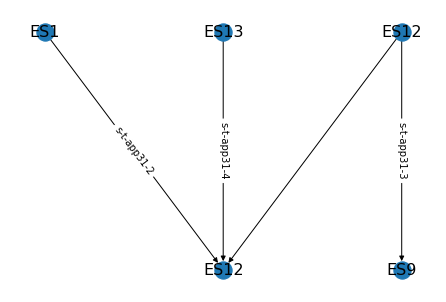

Creating apps with 6 tasks


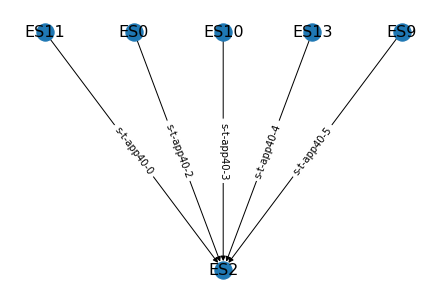

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps3.flex_network_description
Tasks 30; Streams 17; Apps 9; Average ES utilization 0.09558124999999998
--------------------------------------------------
Creating apps with 6 tasks


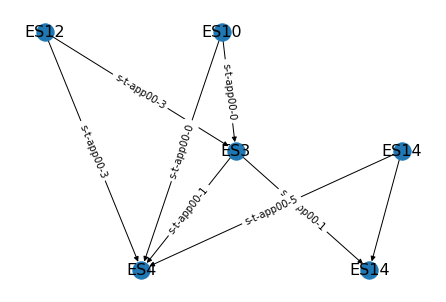

Creating apps with 6 tasks


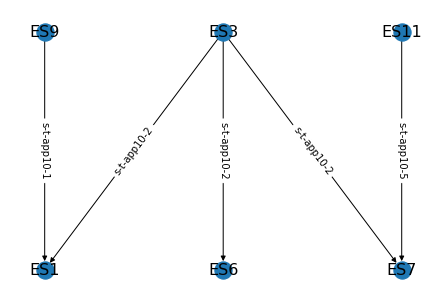

Creating apps with 6 tasks


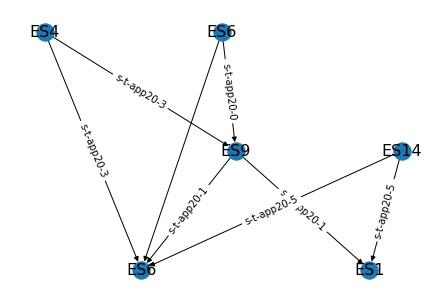

Creating apps with 6 tasks


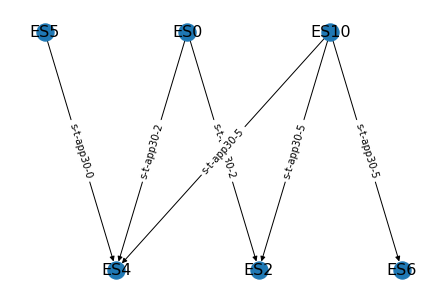

Creating apps with 6 tasks


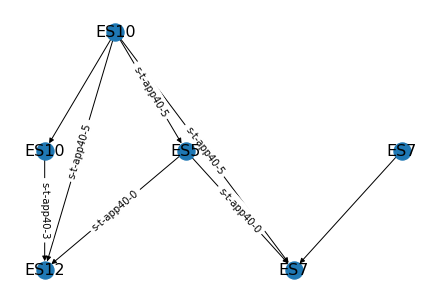

Creating apps with 6 tasks


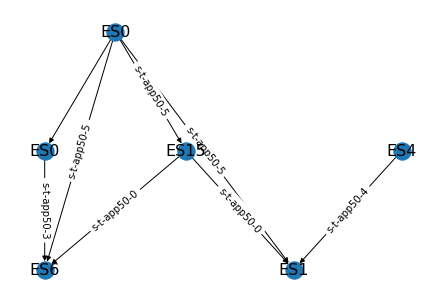

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps4.flex_network_description
Tasks 36; Streams 21; Apps 6; Average ES utilization 0.11219062499999999
--------------------------------------------------
Creating apps with 6 tasks


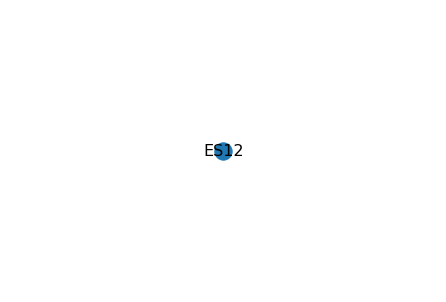

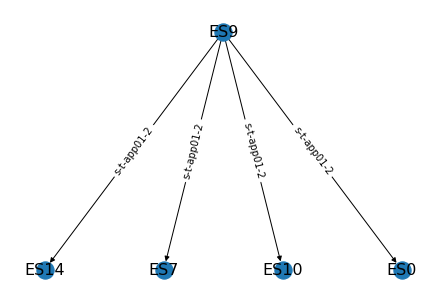

Creating apps with 6 tasks


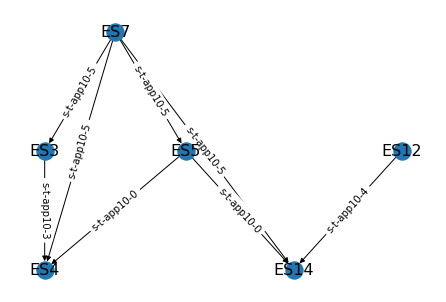

Creating apps with 6 tasks


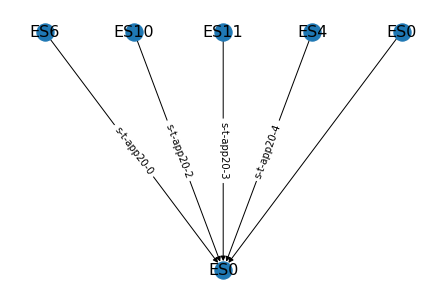

Creating apps with 6 tasks


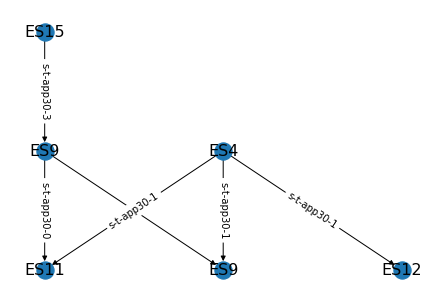

Creating apps with 6 tasks


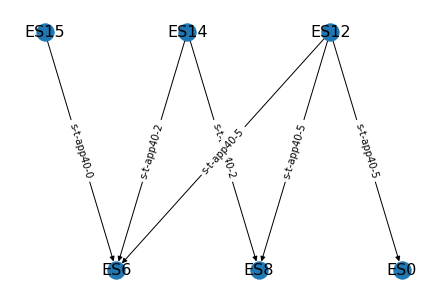

Creating apps with 6 tasks


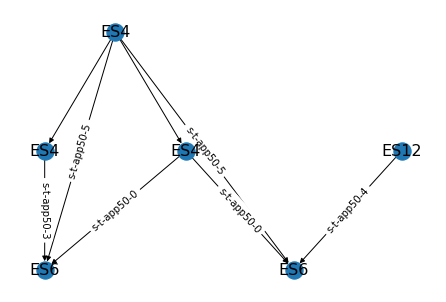

Creating apps with 6 tasks


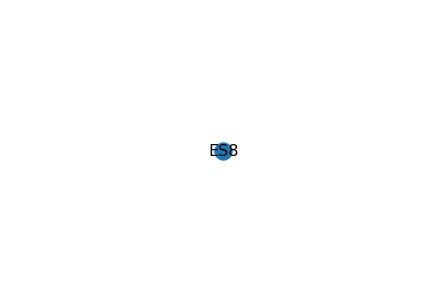

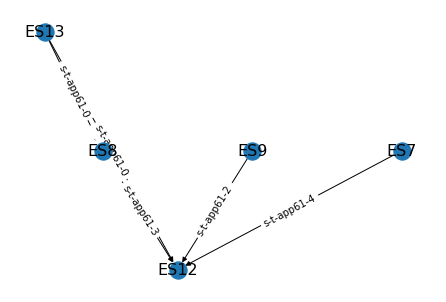

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps5.flex_network_description
Tasks 42; Streams 23; Apps 9; Average ES utilization 0.14586541666666666
--------------------------------------------------
Creating apps with 7 tasks


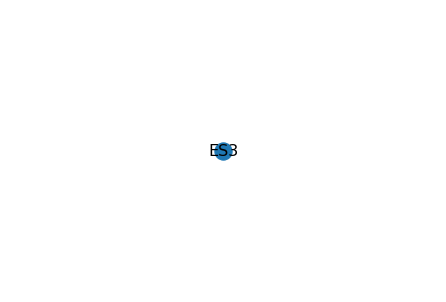

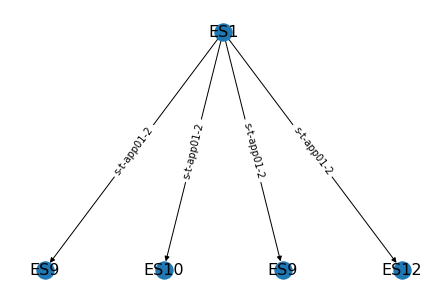

Creating apps with 7 tasks


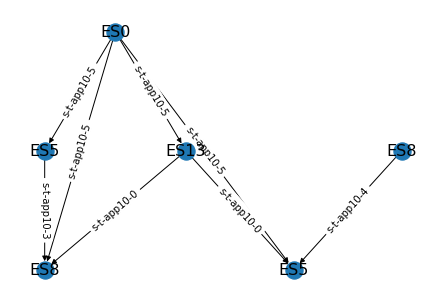

Creating apps with 7 tasks


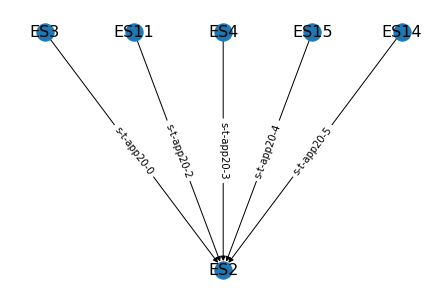

Creating apps with 7 tasks


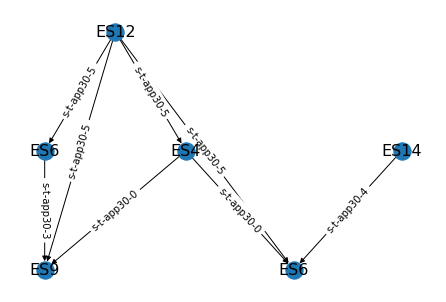

Creating apps with 7 tasks


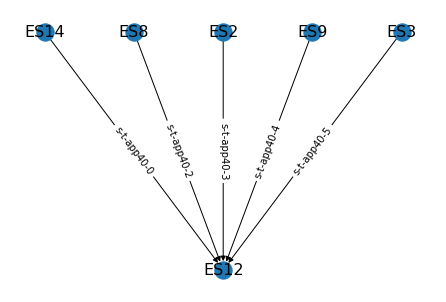

Creating apps with 7 tasks


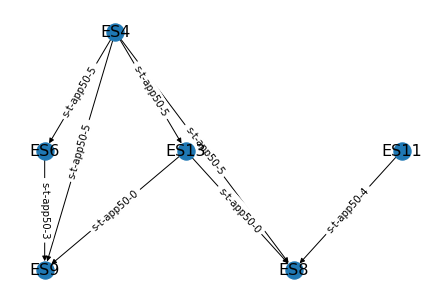

Creating apps with 7 tasks


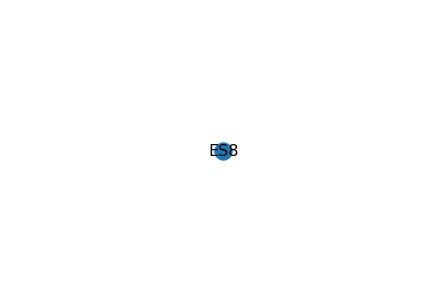

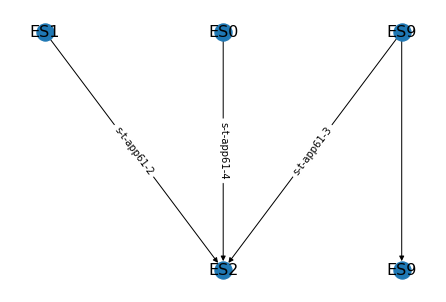

Creating apps with 7 tasks


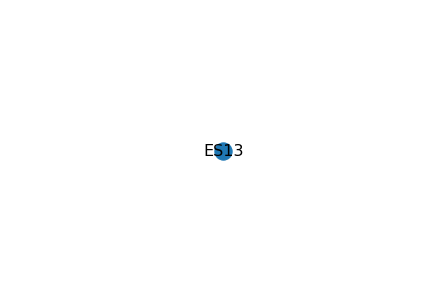

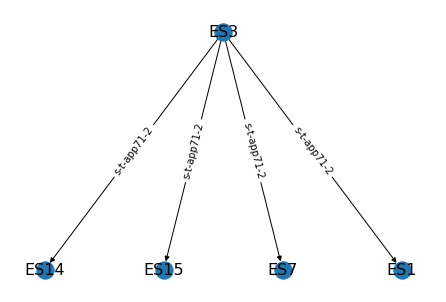

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps6.flex_network_description
Tasks 48; Streams 27; Apps 11; Average ES utilization 0.1712225
--------------------------------------------------
Creating apps with 7 tasks


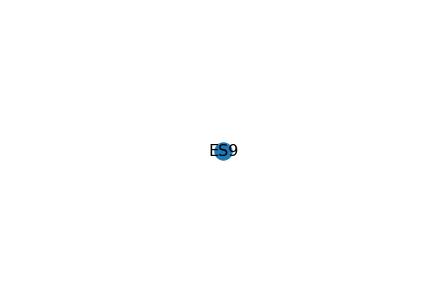

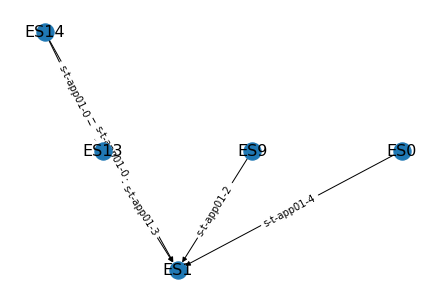

Creating apps with 7 tasks


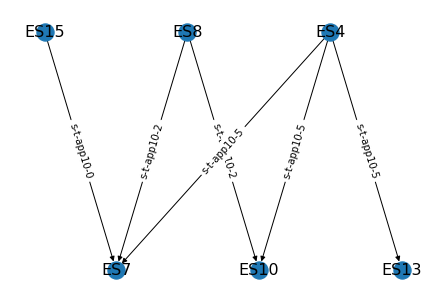

Creating apps with 7 tasks


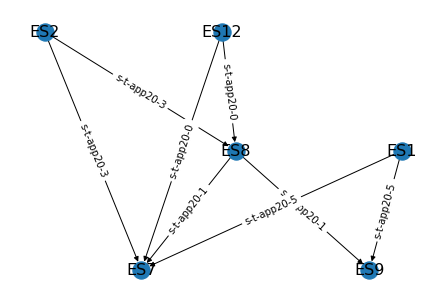

Creating apps with 7 tasks


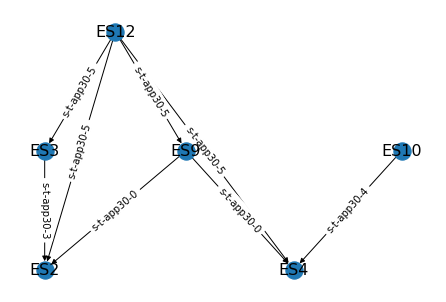

Creating apps with 7 tasks


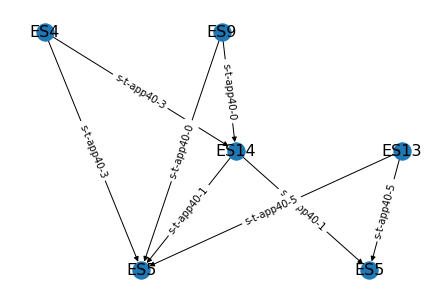

Creating apps with 7 tasks


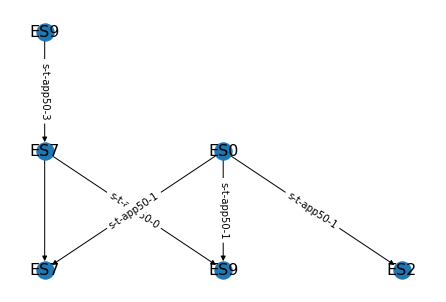

Creating apps with 7 tasks


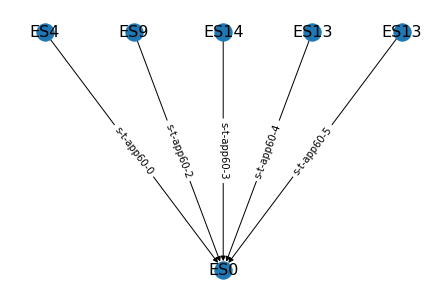

Creating apps with 7 tasks


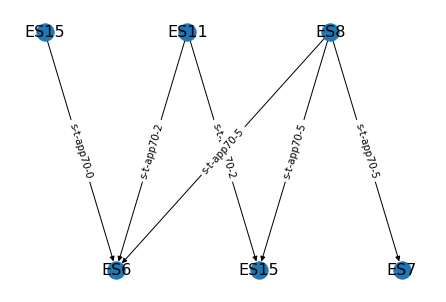

Creating apps with 7 tasks


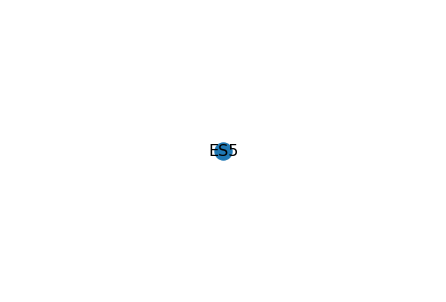

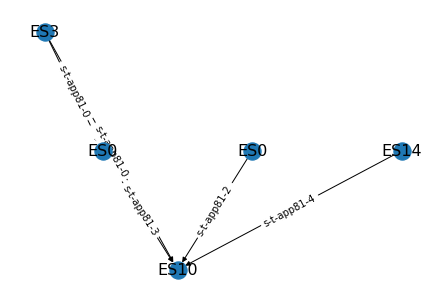

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps7.flex_network_description
Tasks 54; Streams 34; Apps 11; Average ES utilization 0.15863895833333336
--------------------------------------------------
Creating apps with 7 tasks


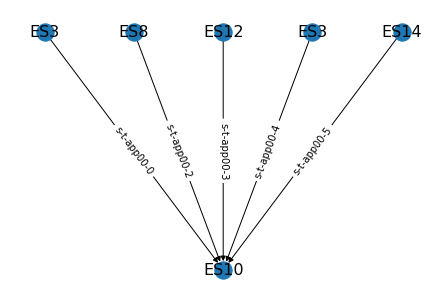

Creating apps with 7 tasks


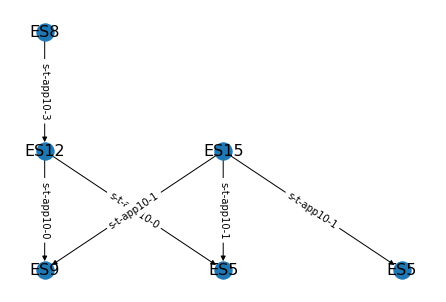

Creating apps with 7 tasks


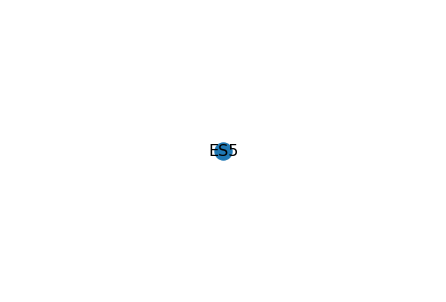

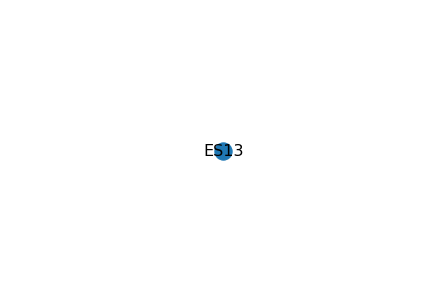

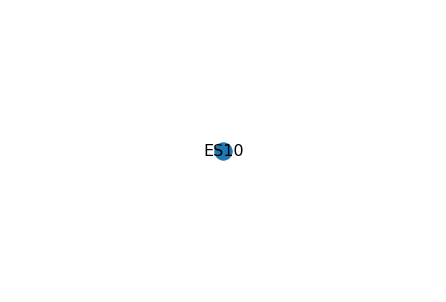

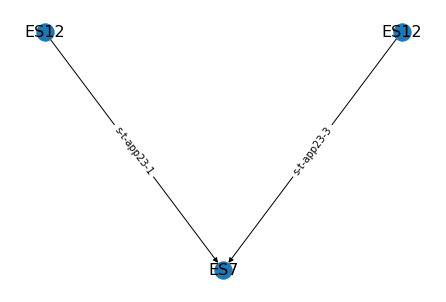

Creating apps with 7 tasks


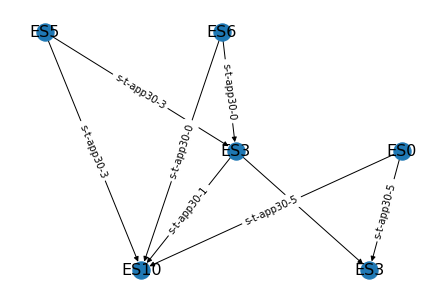

Creating apps with 7 tasks


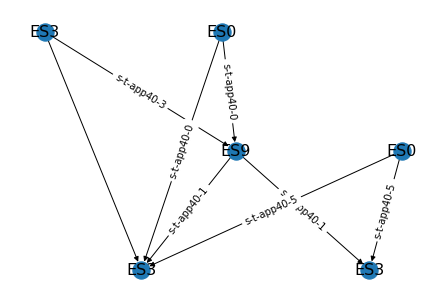

Creating apps with 7 tasks


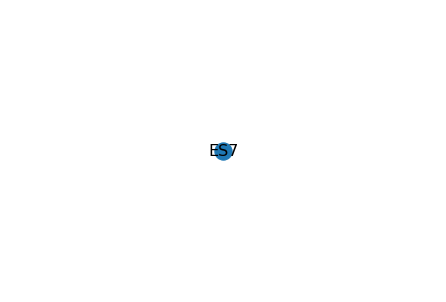

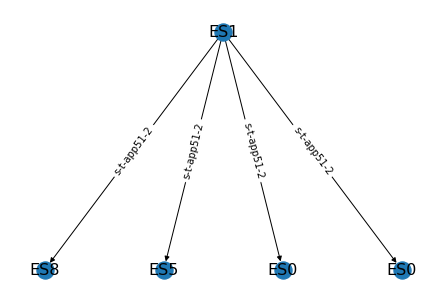

Creating apps with 7 tasks


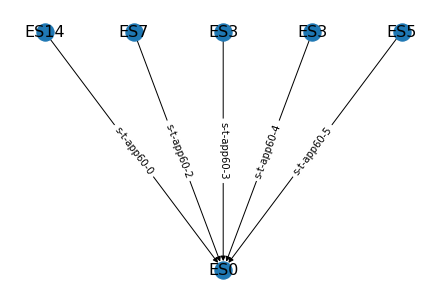

Creating apps with 7 tasks


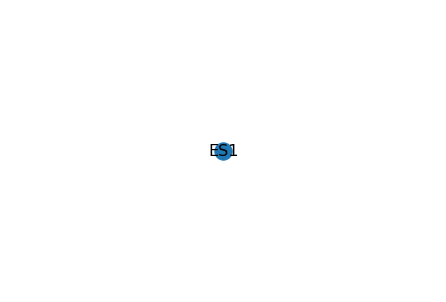

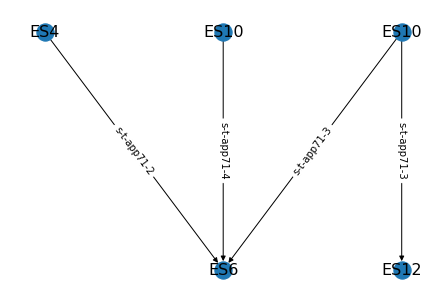

Creating apps with 7 tasks


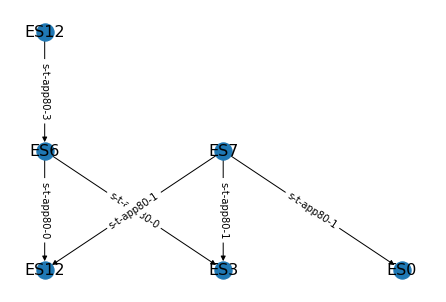

Creating apps with 7 tasks


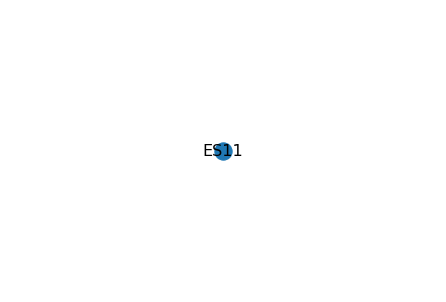

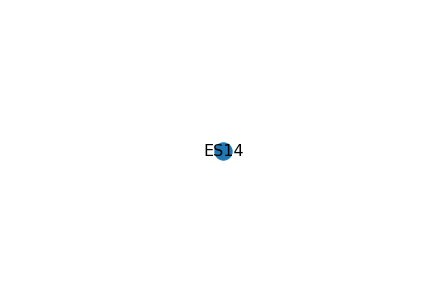

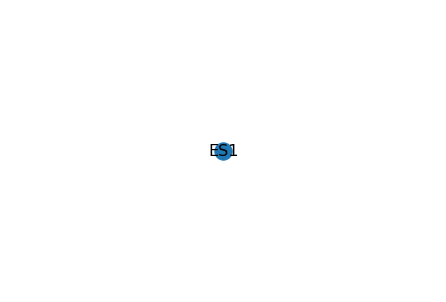

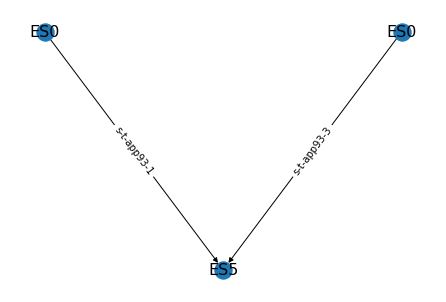

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps8.flex_network_description
Tasks 60; Streams 32; Apps 18; Average ES utilization 0.19418083333333339
--------------------------------------------------
Creating apps with 7 tasks


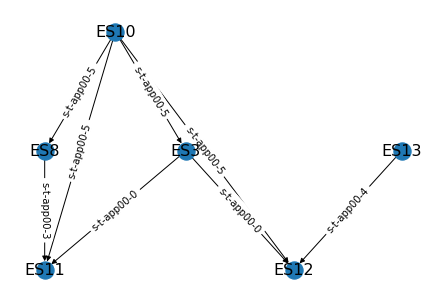

Creating apps with 7 tasks


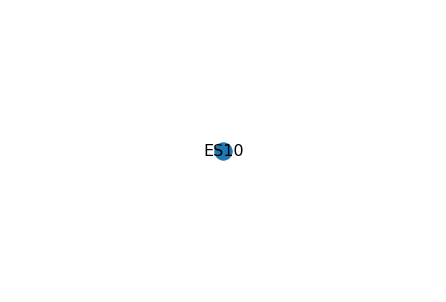

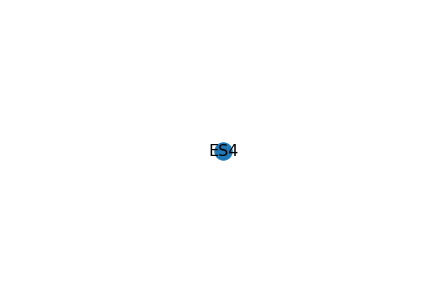

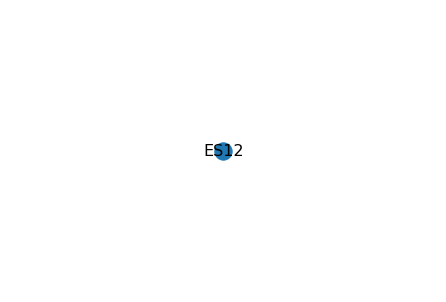

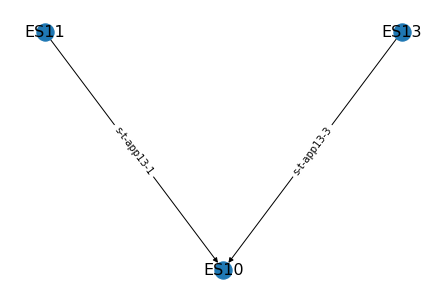

Creating apps with 7 tasks


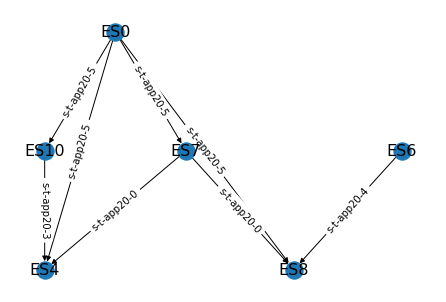

Creating apps with 7 tasks


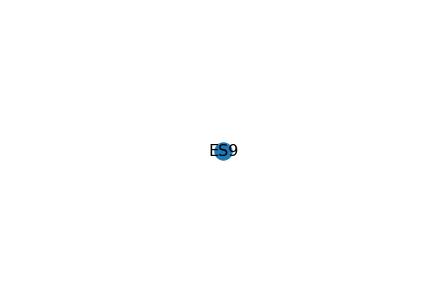

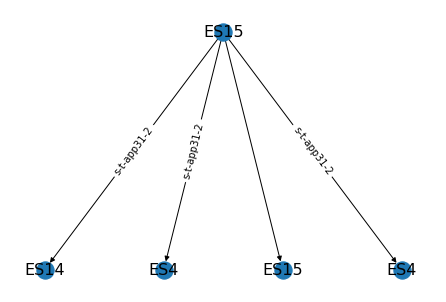

Creating apps with 7 tasks


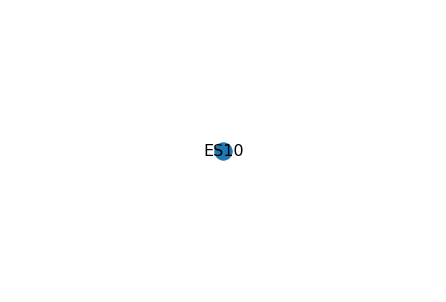

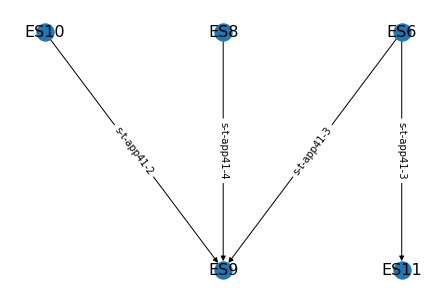

Creating apps with 7 tasks


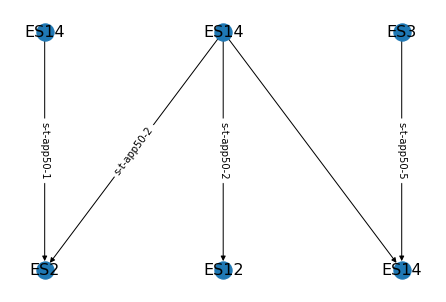

Creating apps with 7 tasks


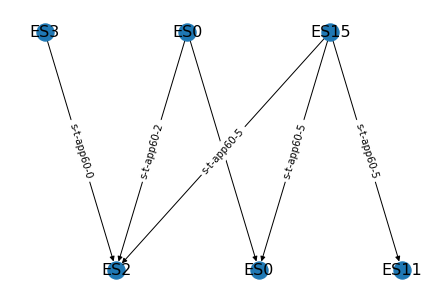

Creating apps with 7 tasks


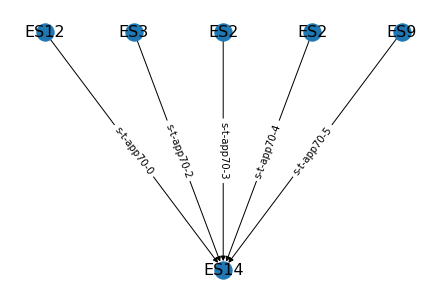

Creating apps with 7 tasks


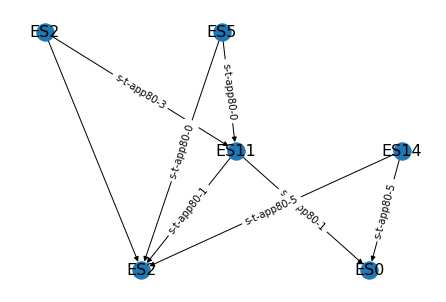

Creating apps with 7 tasks


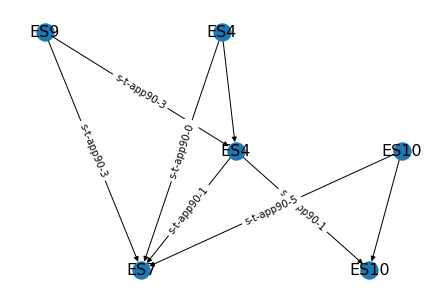

Creating apps with 7 tasks


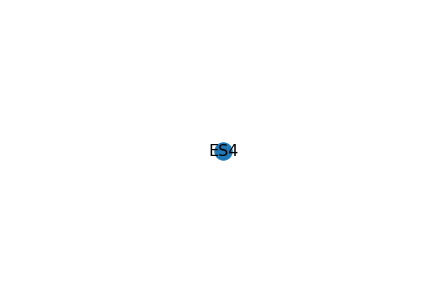

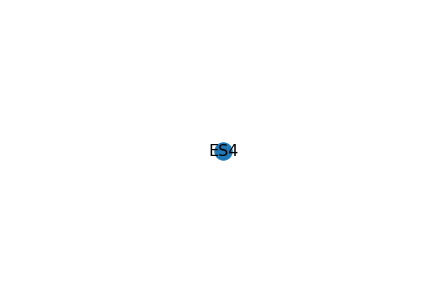

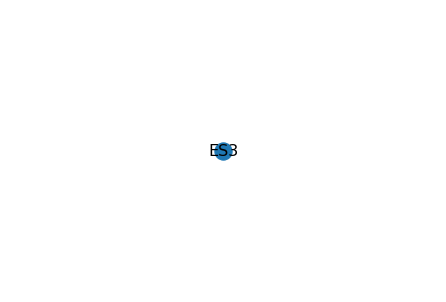

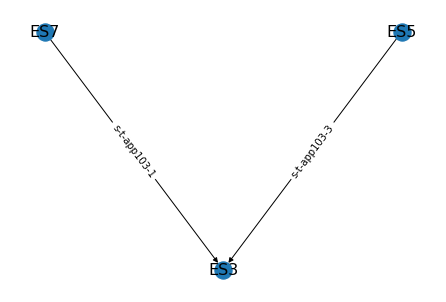

Created testcase at: C:\Users\phd\Nextcloud\PhD\Projects\tesla_publish\results\scalability_figure\..\..\testcases\scalability_figure\apps\apps9.flex_network_description
Tasks 66; Streams 35; Apps 19; Average ES utilization 0.19638000000000005
--------------------------------------------------


In [21]:
nr_tasks = [8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

config = testcase_generation_config()
config.nr_es = 16
config.nr_sw = 8
config.app_task_connection_probability = 0.4
config.periods = [10000, 15000, 20000, 50000]
config.link_speed = 125 # 100 mbit
config.stream_max_rl = 1
config.connections_per_es = min(config.nr_sw, 4)
config.connections_per_sw = config.nr_sw -1

G, points_sw, points_es = topology_creator.generate_topology(config.nr_sw, config.nr_es, config.connections_per_sw,
                                                                     config.connections_per_es, True)

for i in range(10):
    config.nr_tasks = nr_tasks[i]
    config.nr_dags = (config.nr_tasks // 8) + 1

    path = create_testcase_with_topology_and_dags(config, Path(f"../../testcases/scalability_figure/apps/apps{i}.flex_network_description"), G, points_sw, points_es, "")
